In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [348]:
df = pd.read_csv("Titanic-Dataset.csv")

In [349]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


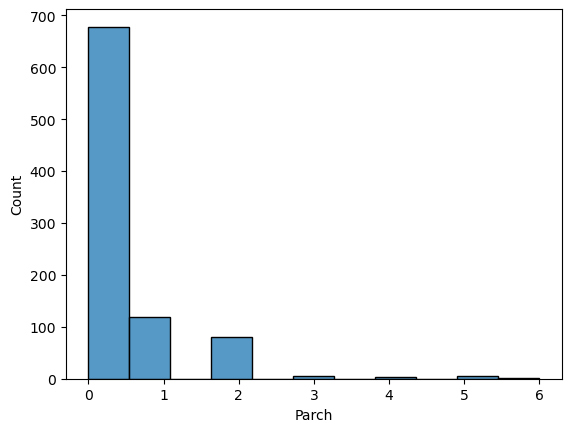

In [350]:
sns.histplot(df['Parch'],kde=False)
plt.show()

C:\Users\20128\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


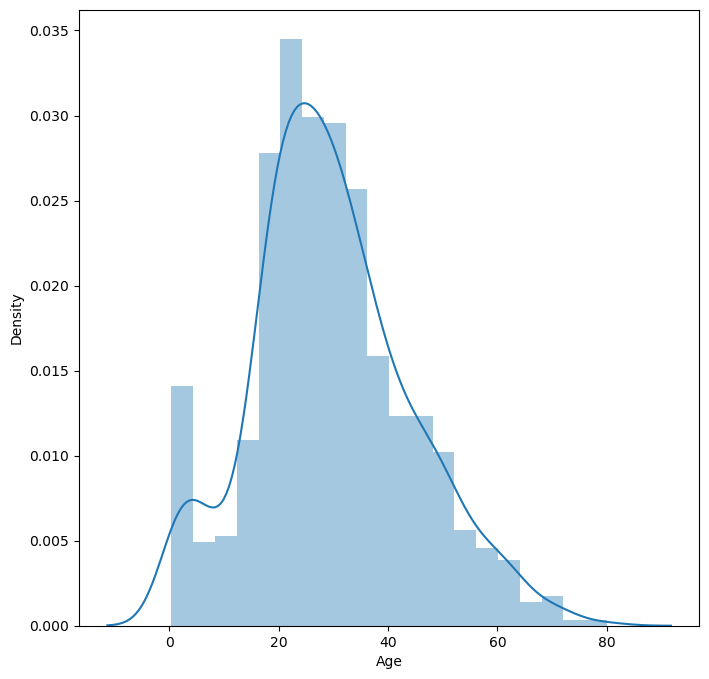

In [351]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

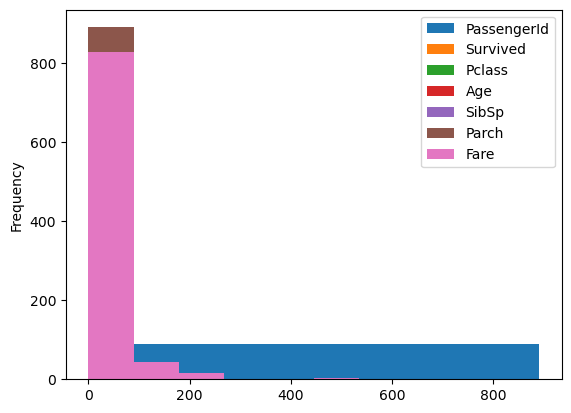

In [352]:
df.plot.hist()

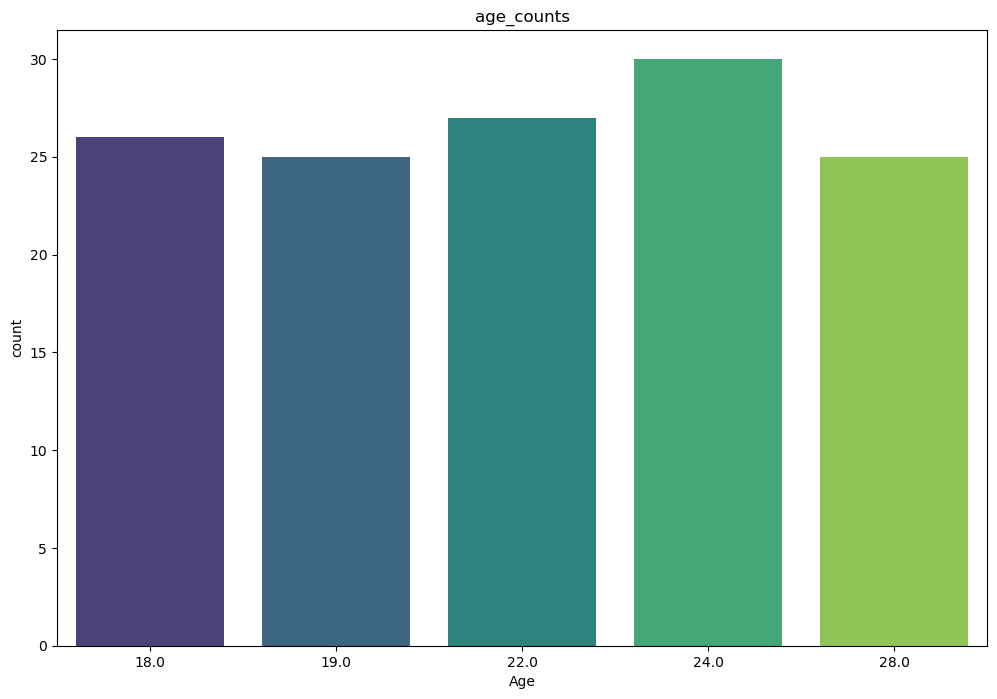

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

In [353]:
age_counts=df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [354]:
Survived=df['Survived'].value_counts()
Survived

0    549
1    342
Name: Survived, dtype: int64

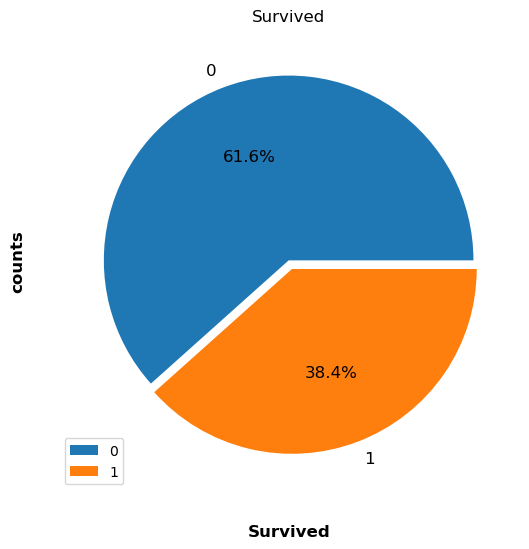

In [355]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 12, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 12, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

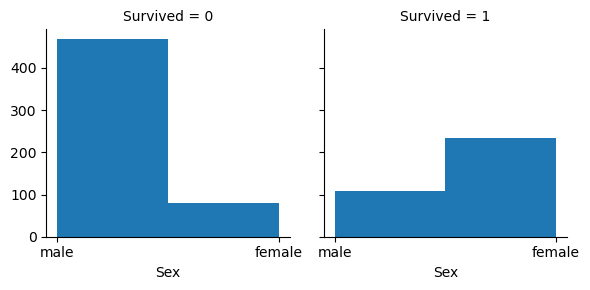

In [356]:
gender=sns.FacetGrid(df,col='Survived')

gender.map(plt.hist,'Sex',bins=2)

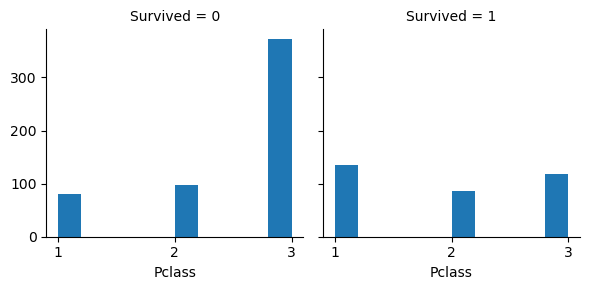

In [357]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

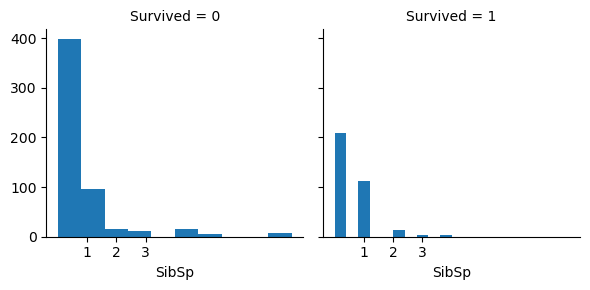

In [358]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'SibSp')

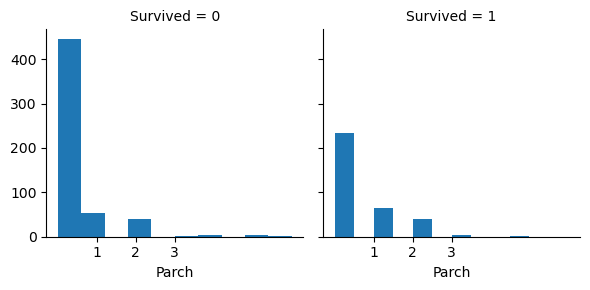

In [359]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Parch')

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [361]:
df.duplicated().sum()

0

In [362]:
df=df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [363]:
#convert the gender to binary 0 and 1
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [364]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [365]:
# Fill missing values in age column by imputing the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [366]:
# Fill missing values in age column by imputing the median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [367]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


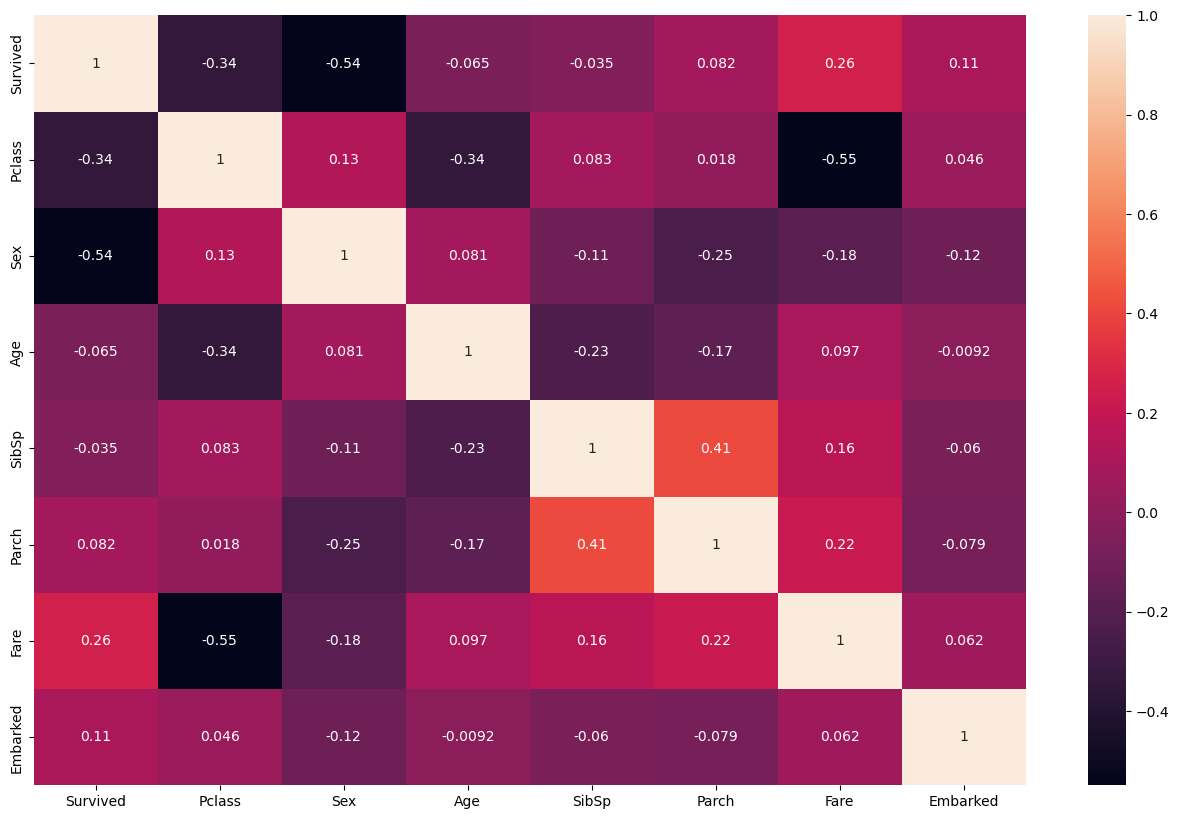

In [368]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [369]:
#Define Features

X= df.drop(columns=['Survived'])
Y = df['Survived']

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,2


In [370]:
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

In [371]:
y=Y.values.reshape(-1,1)

In [372]:
#Splitting Data

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [373]:
#Logistic Regression Model
logistic=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")

In [374]:
logistic.fit(X_train,y_train)

C:\Users\20128\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [375]:
logistic.score(X_train,y_train)

0.8019662921348315

In [376]:
y_pred=logistic.predict(X_test)

In [377]:
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [378]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



[[90 15]
 [21 53]]


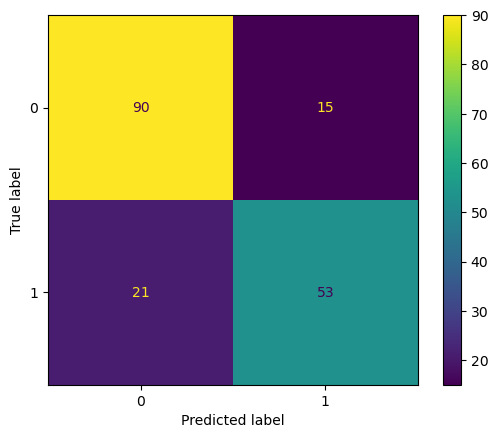

In [379]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [380]:
#Decision Tree Classifier
Dct = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

In [381]:
Dct.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [382]:
Dct.score(X_train,y_train)

0.8342696629213483

In [383]:
dct_y_pred=Dct.predict(X_test)

In [384]:
print(accuracy_score(y_test,dct_y_pred))

0.7988826815642458


In [385]:
print(classification_report(y_test, dct_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



[[92 13]
 [23 51]]


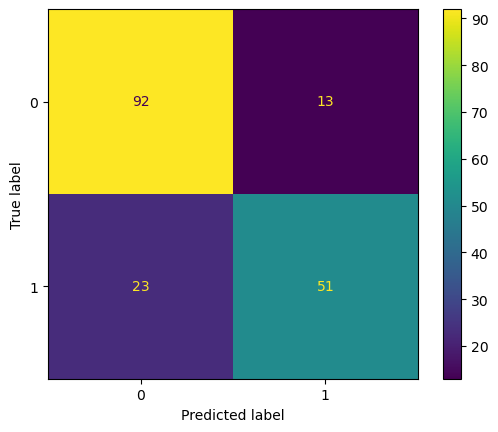

In [386]:
ConfusionMatrixDisplay.from_predictions(y_test, dct_y_pred)
print(confusion_matrix(y_test, dct_y_pred))

In [387]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000)

In [388]:
rf.fit(X_train,y_train)

C:\Users\20128\AppData\Local\Temp\ipykernel_23140\1593328843.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [389]:
rf.score(X_train,y_train)

0.9789325842696629

In [390]:
rf_y_pred = rf.predict(X_test)

In [391]:
print(accuracy_score(y_test,rf_y_pred))

0.8156424581005587


In [392]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



[[89 16]
 [17 57]]


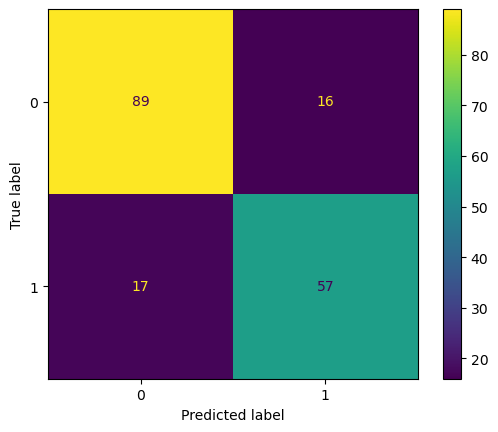

In [393]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred)
print(confusion_matrix(y_test, rf_y_pred))

In [394]:
# Gradient Boosting Machines (GBM) model
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [395]:
gbm.fit(X_train,y_train)

C:\Users\20128\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [396]:
gbm_y_pred = gbm.predict(X_test)

In [397]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2011173184357542


In [398]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7) 

In [399]:
knn.fit(X_train,y_train)

C:\Users\20128\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [400]:
knn_y_pred = knn.predict(X_test)

C:\Users\20128\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [401]:
print(accuracy_score(y_test,knn_y_pred))

0.8044692737430168


In [402]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



[[91 14]
 [21 53]]


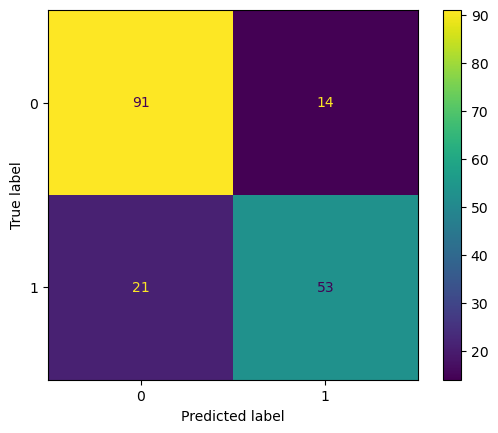

In [403]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred)
print(confusion_matrix(y_test, knn_y_pred))

In [404]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [405]:
gnb.fit(X_train,y_train)

C:\Users\20128\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [406]:
gnb_pred = gnb.predict(X_test)

In [407]:
print(accuracy_score(y_test,gnb_pred))

0.776536312849162


In [408]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



[[85 20]
 [20 54]]


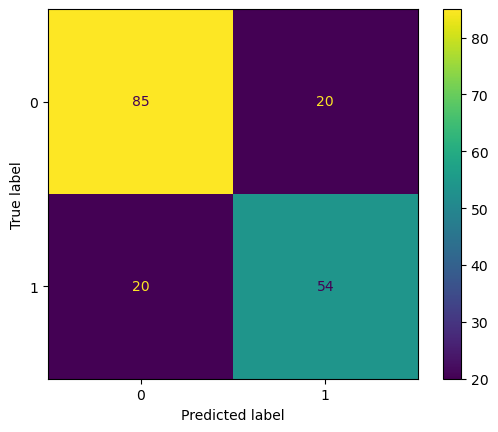

In [409]:
ConfusionMatrixDisplay.from_predictions(y_test, gnb_pred)
print(confusion_matrix(y_test, gnb_pred))